In [1]:
# For wide monitor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import tensorflow as tf

### 출처: https://github.com/golbin/TensorFlow-Tutorials/blob/master/03%20-%20TensorFlow%20Basic/02%20-%20Variable.py
### 3분 딥러닝 03_tensorflow basic

In [ ]:
# 플레스홀더와 변수의 개념 익히기
#tf.placeholder: 계산을 실행할 때 입력값을 받는 변수로 사용한다.
# None은 크기가 정해지지 않았음을 의미함
X = tf.placeholder(tf.float32, [None, 3])
print(X)

In [2]:
# X: 플레이스홀더에 넣을 값
# 플레이스홀더에서 설정한것 처럼 두번째 차원의 요소의 개수는 3개임
x_data = [[1,2,3], [4,5,6]]

In [ ]:
# tf.Variable: 그래프를 계산하면서 최적화할 변수들, 이 값이 바로 신경망을 좌우하는 값들임
# tf.random_normal: 각 변수들의 초기값을 정규분포 랜덥 값으로 초기화함
W = tf.Variable(tf.random_normal([3,2]))
b = tf.Variable(tf.random_normal([2,1]))

In [ ]:
# 입력값과 변수들을 계산할 수식을 작성
# tf.matmul처럼 mat*로 되어 있는 함수로 행렬 계산 수행
expr = tf.matmul(X,W)+b

sess = tf.Session()
# 위에서 설정한 Variable들의 값들을 초기화하기 위해 처음에 tf.global_variables_initializer를 한번 실행해야 함
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
# expr 수식에는 X 라는 입력값이 필요합니다.
# 따라서 expr 실행시에는 이 변수에 대한 실제 입력값을 다음처럼 넣어줘야합니다.
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

# 0722 수업 복습 - CNN MINIST

In [2]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()

In [3]:
print(sess.run(hello))

b'Hello, TensorFlow!'


In [4]:
import pandas as pd

In [5]:
mnist_csv = pd.read_csv('mnist_train.csv', header=None, skiprows=1).values

In [6]:
print(mnist_csv.shape)

(59999, 785)


In [7]:
print(mnist_csv[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84
 252 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 163 252 252 252 253 252 252  96 189 253 16

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mnist_csv, test_size=0.3, random_state=1)

In [9]:
print(train.shape)

(41999, 785)


In [10]:
print(test.shape)

(18000, 785)


In [11]:
mnist_csv[1][0]

4

In [13]:
from keras.utils import np_utils
y_train, X_train = np_utils.to_categorical(train[:,0]), train[:,1:]
y_test, X_test = np_utils.to_categorical(test[:,0]), test[:, 1:]
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(41999, 10) (41999, 784)
(18000, 10) (18000, 784)


In [ ]:
#a<=X<=b
#0<=X-a<=b-a
#0<=(X-a)/(b-a)<=1
#scaling해야함. 딥러닝에서는 이거 안해도 잘 나오긴 함..

X_train = (X_train-0)/255
X_test = (X_test-0)/255
print(X_train[0])
print(X_train[0])

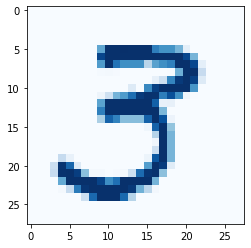

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(X_train[0], (28,28)), cmap=plt.cm.Blues) # 컬러 이미지면 (28,28,3)

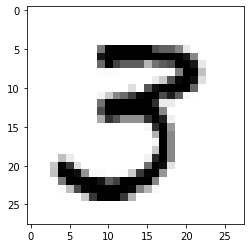

In [15]:
plt.imshow(np.reshape(X_train[0], (28,28)), cmap=plt.cm.gray_r)

In [16]:
# 신경망 입룰력 디자인
import tensorflow as tf
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])

In [17]:
# (28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,16], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
# (28,28,16)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# (14,14,16)
W2 = tf.Variable(tf.random_normal([3,3,16,32], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
L2_flat=tf.reshape(L2, [-1, 7 * 7 * 32]) #Flatten
W3 =tf.Variable(tf.random_normal([7 * 7 * 32, 10], stddev =0.01))
b =tf.Variable(tf.random_normal([10]))
logits =tf.matmul (L2_flat, W3) + b

In [21]:
# 아키텍처를 설계해보세요 - con pool 의 디자인을 바꾸는것. 호출 개수를 바꾸는 것
# 하이퍼파타미터를 설계해보세요 - 필터 개수, 사이즈 이런걸 바꾸는 것.
#구분할 것
#서로다른 cnn 5개 만들어보세요

learning_rate = 0.001
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
training_epochs=10
batch_size=100

In [24]:
for epoch in range(training_epochs): # 눈높이를 몇번 되감느냐
    avg_loss = 0
    total_batch = int(X_train.shape[0]/batch_size)
    for idx in range(total_batch):
        num = (idx*batch_size)%(X_train.shape[0])
        batch_xs = X_train[num:(num+batch_size)]
        batch_ys = y_train[num:(num+batch_size)]
        feed_dict = {X:batch_xs, y:batch_ys}
        c, _ = sess.run([loss, optimizer], feed_dict=feed_dict)
        avg_loss+=c/total_batch
    print("Epoch:", "%04d"%(epoch+1), "loss=", "{:.9f}".format(avg_loss))

Epoch: 0001 loss= 0.190092505
Epoch: 0002 loss= 0.054829069
Epoch: 0003 loss= 0.042128362
Epoch: 0004 loss= 0.032817146
Epoch: 0005 loss= 0.026827300
Epoch: 0006 loss= 0.021969785
Epoch: 0007 loss= 0.019876944
Epoch: 0008 loss= 0.017260444
Epoch: 0009 loss= 0.016925527
Epoch: 0010 loss= 0.014395524


In [25]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_test, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:", sess.run(accuracy, feed_dict={X:X_test, y:y_test}))

Accuracy: 0.98216665


In [26]:
from sklearn.metrics import confusion_matrix
import itertools


In [30]:
# 예쁜 confusion_matrix
def plot_confusion_matrix(pred, label, class_info):
    cnf_matrix = confusion_matrix(label, pred)
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    tick_marks = np.arange(len(class_info))
    plt.xticks(tick_marks, class_info, rotation=45)
    plt.yticks(tick_marks, class_info)
    thresh = cnf_matrix.max()/2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]),
                                 range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i,j], horizontalalignment="center",
                 color="white" if cnf_matrix [i, j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

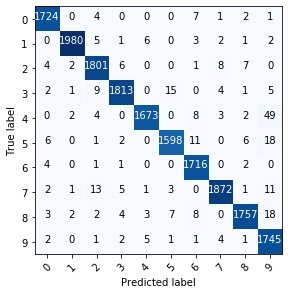

In [31]:
prediction = tf.argmax(logits,1)
pred = sess.run(prediction, feed_dict={X:X_test})
label = np.argmax(y_test, axis=1)
class_info=['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(pred, label, class_info=class_info)

### Load the CIFAR10 dataset from a library

In [32]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 85s 1us/step


In [33]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [34]:
from keras.utils import np_utils
x_train = x_train[0:5000,:,:,:]
y_train_notOne = y_train[0:5000,:]
x_test = x_test[0:1000,:,:,:]
y_test_notOne = y_test[0:1000,:]

In [35]:
y_train = np_utils.to_categorical(y_train_notOne)
y_test = np_utils.to_categorical(y_test_notOne)

In [36]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 32, 32, 3) (5000, 10)
(1000, 32, 32, 3) (1000, 10)


In [37]:
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D

In [38]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))


In [40]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

ValueError: Input 0 is incompatible with layer flatten_2: expected min_ndim=3, found ndim=2